# hallmark

In [1]:
library(Seurat)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [2]:
sc.all.merge <- readRDS('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sc.all.merge.T1T2T3a.harmony.final.refine.rds')

In [3]:
sc.all.merge

An object of class Seurat 
32285 features across 91411 samples within 1 assay 
Active assay: RNA (32285 features, 2000 variable features)
 19 layers present: counts.T1_a3026, counts.T1_a3028, counts.T1_a3030, counts.T2_a3026, counts.T2_a3028, counts.T2_a3030, counts.T3_a3026, counts.T3_a3028, counts.T3_a3030, scale.data, data.T1_a3026, data.T1_a3028, data.T1_a3030, data.T2_a3026, data.T2_a3028, data.T2_a3030, data.T3_a3026, data.T3_a3028, data.T3_a3030
 4 dimensional reductions calculated: pca, umap, harmony, umap.harmony

In [4]:
table(sc.all.merge$time)


   T1    T2    T3 
34774 27081 29556 

In [10]:
sc.all.merge@meta.data$time_cluster <- paste0(sc.all.merge@meta.data$time,'_',sc.all.merge@meta.data$seurat_clusters_rename)
sc.all.merge@meta.data$time_cluster <- factor(sc.all.merge@meta.data$time_cluster,
                                              levels = c('T1_1','T2_1','T3_1','T1_2','T2_2','T3_2',
                                                        'T1_3','T2_3','T3_3','T1_4','T2_4','T3_4','T1_5','T2_5','T3_5'))

In [5]:
library(ggplot2)

In [6]:
sc.all.merge <- JoinLayers(sc.all.merge)

In [11]:
gmt <- clusterProfiler::read.gmt('/syn1/liangzhen/fanli_tfseq_project/hisat2_index/mh.all.v2023.2.Mm.symbols.gmt')
h_df = gmt[,c(2,1)]
h_list = unstack(h_df)

In [12]:
Idents(sc.all.merge) <- sc.all.merge@meta.data$time_cluster

In [13]:
exp  =  AverageExpression(sc.all.merge)[[1]]
exp  =  as.matrix(exp)
exp  =  exp[rowSums(exp)>0,] 

As of Seurat v5, we recommend using AggregateExpression to perform pseudo-bulk analysis.
This message is displayed once per session.
Names of identity class contain underscores ('_'), replacing with dashes ('-')
This message is displayed once every 8 hours.


In [14]:
library(GSVA)

In [15]:
ES  =  GSVA::gsva(exp, h_list,method='ssgsea')

Warning message:
“Calling gsva(expr=., gset.idx.list=., method=., ...) is deprecated; use a method-specific parameter object (see '?gsva').”


Estimating ssGSEA scores for 50 gene sets.
[1] "Calculating ranks..."
[1] "Calculating absolute values from ranks..."
  |======================================================================| 100%

[1] "Normalizing..."


In [16]:
ES <- ES[c('HALLMARK_UNFOLDED_PROTEIN_RESPONSE','HALLMARK_HYPOXIA','HALLMARK_P53_PATHWAY','HALLMARK_HEME_METABOLISM','HALLMARK_PROTEIN_SECRETION',
          'HALLMARK_MTORC1_SIGNALING','HALLMARK_SPERMATOGENESIS','HALLMARK_MYC_TARGETS_V1','HALLMARK_MYC_TARGETS_V2','HALLMARK_DNA_REPAIR',
          'HALLMARK_TGF_BETA_SIGNALING','HALLMARK_APICAL_SURFACE','HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION','HALLMARK_WNT_BETA_CATENIN_SIGNALING','HALLMARK_NOTCH_SIGNALING',
          'HALLMARK_OXIDATIVE_PHOSPHORYLATION','HALLMARK_CHOLESTEROL_HOMEOSTASIS','HALLMARK_GLYCOLYSIS','HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY','HALLMARK_PEROXISOME',
          'HALLMARK_TNFA_SIGNALING_VIA_NFKB','HALLMARK_INTERFERON_ALPHA_RESPONSE','HALLMARK_INTERFERON_GAMMA_RESPONSE', 'HALLMARK_IL6_JAK_STAT3_SIGNALING','HALLMARK_INFLAMMATORY_RESPONSE'),]

In [17]:
library(ggplot2)

In [19]:
library(RColorBrewer)

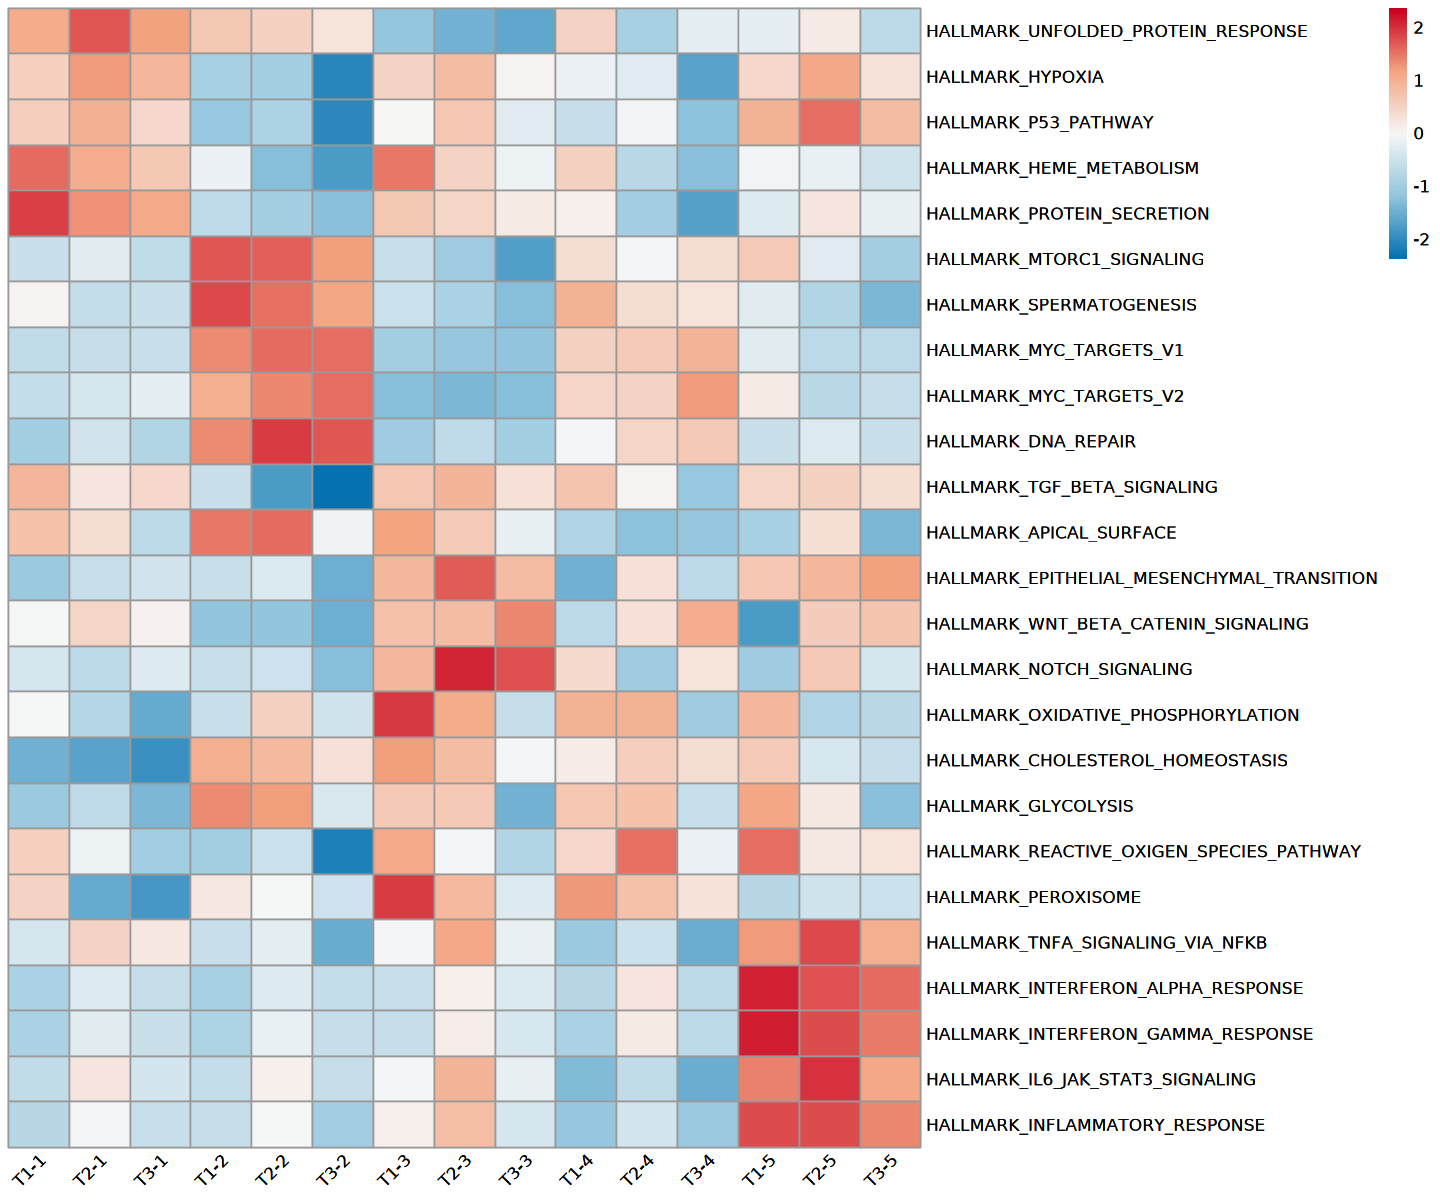

In [21]:
options(repr.plot.width=12, repr.plot.height=10)
library(pheatmap)
plot <- pheatmap(ES, scale = "row",angle_col = "45",cluster_cols = F,cluster_rows = F,
         color = colorRampPalette(rev(brewer.pal(n = 5, name = "RdBu")))(200))
print(plot)
ggsave(plot,file='/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure2.sup/hallmark_heatmap_selected.pdf',width=12,height=10)

# GO

In [32]:
library(Seurat)

In [33]:
sc.all.merge <- readRDS('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sc.all.merge.T1T2T3a.harmony.final.refine.rds')

In [35]:
sc.all.merge@meta.data[sc.all.merge@meta.data$time=='T2' & sc.all.merge@meta.data$Assignment_0.7=='CMO301','orig.ident'] <- 'T2_a3026_1'
sc.all.merge@meta.data[sc.all.merge@meta.data$time=='T2' & sc.all.merge@meta.data$Assignment_0.7=='CMO302','orig.ident'] <- 'T2_a3026_2'
sc.all.merge@meta.data[sc.all.merge@meta.data$time=='T2' & sc.all.merge@meta.data$Assignment_0.7=='CMO303','orig.ident'] <- 'T2_a3028_1'
sc.all.merge@meta.data[sc.all.merge@meta.data$time=='T2' & sc.all.merge@meta.data$Assignment_0.7=='CMO304','orig.ident'] <- 'T2_a3028_2'
sc.all.merge@meta.data[sc.all.merge@meta.data$time=='T2' & sc.all.merge@meta.data$Assignment_0.7=='CMO305','orig.ident'] <- 'T2_a3030_1'
sc.all.merge@meta.data[sc.all.merge@meta.data$time=='T2' & sc.all.merge@meta.data$Assignment_0.7=='CMO306','orig.ident'] <- 'T2_a3030_2'
sc.all.merge@meta.data[sc.all.merge@meta.data$time=='T3' & sc.all.merge@meta.data$Assignment_0.7=='CMO301','orig.ident'] <- 'T3_a3026_1_1'
sc.all.merge@meta.data[sc.all.merge@meta.data$time=='T3' & sc.all.merge@meta.data$Assignment_0.7=='CMO307','orig.ident'] <- 'T3_a3026_2_1'
sc.all.merge@meta.data[sc.all.merge@meta.data$time=='T3' & sc.all.merge@meta.data$Assignment_0.7=='CMO303','orig.ident'] <- 'T3_a3028_1_1'
sc.all.merge@meta.data[sc.all.merge@meta.data$time=='T3' & sc.all.merge@meta.data$Assignment_0.7=='CMO304','orig.ident'] <- 'T3_a3028_2_1'
sc.all.merge@meta.data[sc.all.merge@meta.data$time=='T3' & sc.all.merge@meta.data$Assignment_0.7=='CMO305','orig.ident'] <- 'T3_a3030_1_1'
sc.all.merge@meta.data[sc.all.merge@meta.data$time=='T3' & sc.all.merge@meta.data$Assignment_0.7=='CMO306','orig.ident'] <- 'T3_a3030_2_1'


In [63]:
sc.all.merge@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.2,seurat_clusters,pANN_0.25_0.12_592,Doublet_or_Singlet,pANN_0.25_0.21_600,pANN_0.25_0.19_742,⋯,pANN_0.25_0.17_630,pANN_0.25_0.29_759,pANN_0.25_0.28_612,pANN_0.25_0.14_771,pANN_0.25_0.07_798,RNA_snn_res.0.3,harmony_clusters,seurat_clusters_rename,umapharmony_1,umapharmony_2
,<chr>,<dbl>,<int>,<dbl>,<chr>,<fct>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<chr>,<dbl>,<dbl>
T1_T1_a3026_AAACCCAAGACTAGAT-1,T1_a3026,23101,4348,5.6534349,1,1,0.31401210,Singlet,NA,NA,⋯,NA,NA,NA,NA,NA,1,1,2,3.9604470,5.4197859
T1_T1_a3026_AAACCCACATGAGATA-1,T1_a3026,13159,3546,2.0290296,0,2,0.35635081,Singlet,NA,NA,⋯,NA,NA,NA,NA,NA,0,2,1,-4.3216055,-2.7615321
T1_T1_a3026_AAACCCAGTCGCTGCA-1,T1_a3026,15441,3362,5.9840684,0,2,0.25604839,Singlet,NA,NA,⋯,NA,NA,NA,NA,NA,0,2,1,-2.2831264,-2.0551043
T1_T1_a3026_AAACCCAGTCTCGCGA-1,T1_a3026,87500,7440,4.8742857,0,2,0.45211694,Singlet,NA,NA,⋯,NA,NA,NA,NA,NA,0,2,1,-2.3479148,-1.7235541
T1_T1_a3026_AAACCCATCACGGGAA-1,T1_a3026,22915,3939,4.2330351,0,2,0.25000000,Singlet,NA,NA,⋯,NA,NA,NA,NA,NA,0,2,1,-2.8805269,-2.3351765
T1_T1_a3026_AAACCCATCGCTTACC-1,T1_a3026,16459,4443,1.6951212,0,2,0.35584677,Singlet,NA,NA,⋯,NA,NA,NA,NA,NA,0,2,1,-3.2611917,-3.7758344
T1_T1_a3026_AAACGAAAGATGAAGG-1,T1_a3026,41955,5372,2.9293290,0,1,0.34274194,Singlet,NA,NA,⋯,NA,NA,NA,NA,NA,5,1,2,-3.9233058,-2.5635064
T1_T1_a3026_AAACGAAAGATGGCGT-1,T1_a3026,23998,4543,3.2752729,1,1,0.32409274,Singlet,NA,NA,⋯,NA,NA,NA,NA,NA,1,1,2,2.9485046,2.2712824
T1_T1_a3026_AAACGAAAGGATACAT-1,T1_a3026,19233,3932,3.7227682,0,0,0.35181452,Singlet,NA,NA,⋯,NA,NA,NA,NA,NA,0,0,3,-1.1678324,-2.1568299


In [36]:
sc.all.merge.cluster4 <- subset(sc.all.merge,seurat_clusters_rename=='4')
sc.all.merge.cluster4

An object of class Seurat 
32285 features across 6190 samples within 1 assay 
Active assay: RNA (32285 features, 2000 variable features)
 19 layers present: counts.T1_a3026, counts.T1_a3028, counts.T1_a3030, counts.T2_a3026, counts.T2_a3028, counts.T2_a3030, counts.T3_a3026, counts.T3_a3028, counts.T3_a3030, scale.data, data.T1_a3026, data.T1_a3028, data.T1_a3030, data.T2_a3026, data.T2_a3028, data.T2_a3030, data.T3_a3026, data.T3_a3028, data.T3_a3030
 4 dimensional reductions calculated: pca, umap, harmony, umap.harmony

In [37]:
sc.all.merge.cluster4

An object of class Seurat 
32285 features across 6190 samples within 1 assay 
Active assay: RNA (32285 features, 2000 variable features)
 19 layers present: counts.T1_a3026, counts.T1_a3028, counts.T1_a3030, counts.T2_a3026, counts.T2_a3028, counts.T2_a3030, counts.T3_a3026, counts.T3_a3028, counts.T3_a3030, scale.data, data.T1_a3026, data.T1_a3028, data.T1_a3030, data.T2_a3026, data.T2_a3028, data.T2_a3030, data.T3_a3026, data.T3_a3028, data.T3_a3030
 4 dimensional reductions calculated: pca, umap, harmony, umap.harmony

In [38]:
sc.all.merge.cluster4 <- FindNeighbors(sc.all.merge.cluster4, dims = 1:30,reduction = "harmony")
sc.all.merge.cluster4 <- FindClusters(sc.all.merge.cluster4, resolution = 0.1)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6190
Number of edges: 233679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9311
Number of communities: 2
Elapsed time: 0 seconds


In [39]:
library(ggplot2)

In [41]:
sc.all.merge.cluster4 <- JoinLayers(sc.all.merge.cluster4)

In [42]:
sc.all.merge.cluster4.markers <- FindAllMarkers(sc.all.merge.cluster4, only.pos = TRUE)

Calculating cluster 0

Calculating cluster 1



In [43]:
library(dplyr)

In [54]:
sc.all.merge.cluster4.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 100) %>%
    ungroup() -> top100

In [103]:
library('clusterProfiler')
library("org.Mm.eg.db")

In [47]:
cluster.markers <- read.table('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure2.sup/cluster_DEGs_top100.csv',sep=',')
cluster.markers

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,0,4.275370,0.897,0.129,0,2,Pclaf
2,0,3.757732,0.773,0.103,0,2,Spc24
3,0,3.679177,0.855,0.185,0,2,Tk1
4,0,4.155450,0.729,0.062,0,2,Ccna2
5,0,4.063172,0.747,0.081,0,2,Mki67
6,0,3.109348,0.862,0.198,0,2,Smc2
7,0,3.921812,0.812,0.155,0,2,Ube2c
8,0,3.268513,0.792,0.142,0,2,Cdca8
9,0,2.861734,0.822,0.173,0,2,Racgap1


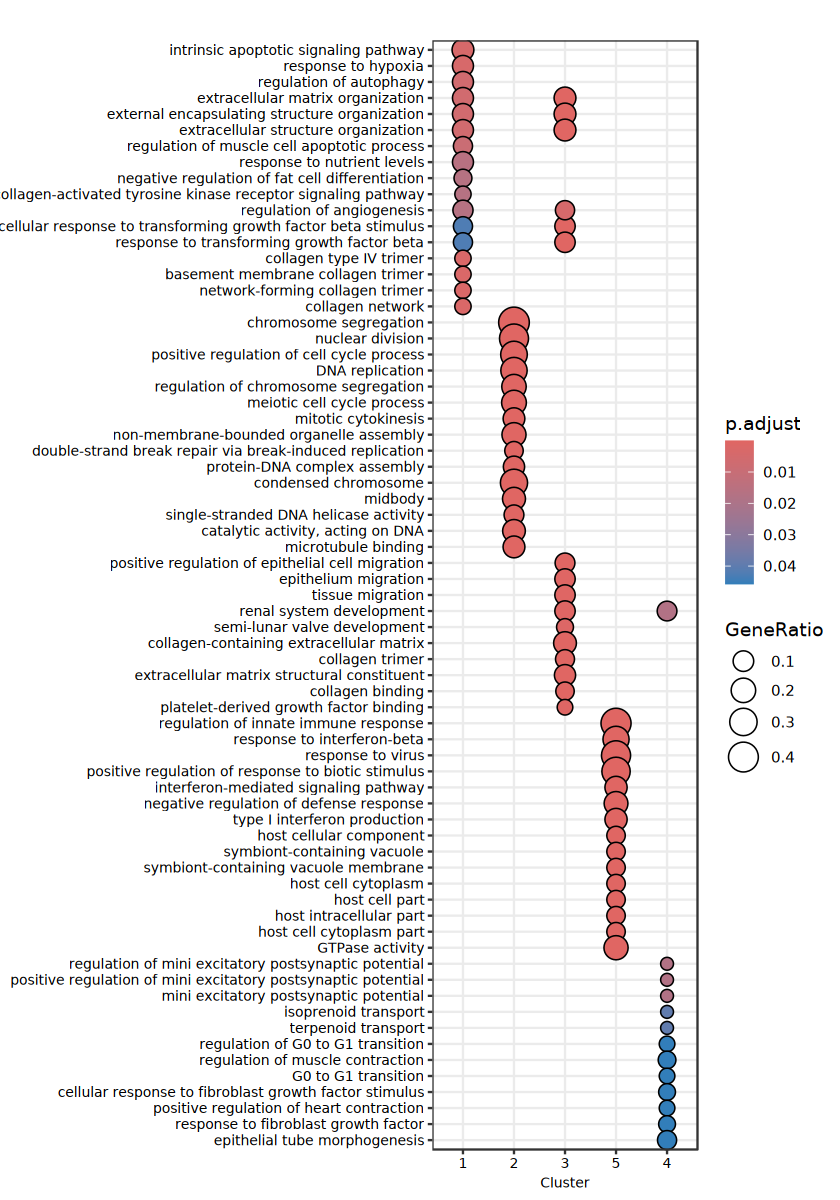

In [58]:
enrich_gene_list_for_test <- list("1"=cluster.markers$gene[cluster.markers$cluster==1],"2"=cluster.markers$gene[cluster.markers$cluster==2],
                                  "3"=cluster.markers$gene[cluster.markers$cluster==3],"5"=cluster.markers$gene[cluster.markers$cluster==5],
                                  "4"=cluster.markers$gene[cluster.markers$cluster==4]
                                )

compare_enrich <- compareCluster(geneCluster = enrich_gene_list_for_test,
                              keyType = 'SYMBOL',
                                   ont = "ALL",
                                   OrgDb = 'org.Mm.eg.db',
                                   pAdjustMethod = "BH",
                                    minGSSize = 2,
                                   fun =  enrichGO)
compare_enrich <- simplify(compare_enrich,cutoff=0.6)
options(repr.plot.width = 7, repr.plot.height = 10)
plot <- dotplot(compare_enrich,label_format = 100 ,showCategory=15, font.size=8)
print(plot)

In [57]:
df <- data.frame('state' = c(rep('state 1',length(cluster.markers$gene[cluster.markers$cluster==1])),
                            rep('state 2',length(cluster.markers$gene[cluster.markers$cluster==2])),
                            rep('state 3',length(cluster.markers$gene[cluster.markers$cluster==3])),
                            rep('state 4',length(top100$gene[top100$cluster==0])), 
                            rep('state 5',length(cluster.markers$gene[cluster.markers$cluster==5]))
                            ),
                 'genes' = c(cluster.markers$gene[cluster.markers$cluster==1],
                            cluster.markers$gene[cluster.markers$cluster==2],
                             cluster.markers$gene[cluster.markers$cluster==3],
                             top100$gene[top100$cluster==0],
                             cluster.markers$gene[cluster.markers$cluster==5]
                            )
                            )
df

state,genes
<chr>,<chr>
state 1,Ddit3
state 1,4930447F24Rik
state 1,Ero1l
state 1,Akr1c18
state 1,Snhg12
state 1,Epb41l4aos
state 1,Mmp13
state 1,Hmox1
state 1,F3


In [58]:
table(df$state)


state 1 state 2 state 3 state 4 state 5 
     71     100     100     100     100 

In [59]:
write.table(df,file='top100_state-markers_seleced.csv',sep=',',quote=F,row.names=F,col.names=T)

In [ ]:
enrich_gene_list_for_test <- list("1"=cluster.markers$gene[cluster.markers$cluster==1],"2"=cluster.markers$gene[cluster.markers$cluster==2],
                                  "3"=cluster.markers$gene[cluster.markers$cluster==3],"5"=cluster.markers$gene[cluster.markers$cluster==5],
                                  "4"=top100$gene[top100$cluster==0]
                                )

compare_enrich <- compareCluster(geneCluster = enrich_gene_list_for_test,
                              keyType = 'SYMBOL',
                                   ont = "ALL",
                                   OrgDb = 'org.Mm.eg.db',
                                   pAdjustMethod = "BH",
                                    minGSSize = 3,
                                   fun =  enrichGO)
compare_enrich <- simplify(compare_enrich,cutoff=0.6)

In [ ]:
write.table(compare_enrich@compareClusterResult,file='cluster_GO.csv',sep=',',col.names = NA,quote=F)

In [153]:
compareClusterResult_selected <- compare_enrich@compareClusterResult[ compare_enrich@compareClusterResult$ID %in%c('GO:0097193',
'GO:0001666',
'GO:0010506',
'GO:0030198',
'GO:0045229',
'GO:0071560',
'GO:0007059',
'GO:0000280',
'GO:0090068',
'GO:0006260',
'GO:1905005',
'GO:1905007', 
'GO:0002053',                                                                                                                  
'GO:0051983',
'GO:0010634',
'GO:0016052',
'GO:0061723',
'GO:0051090',
'GO:2001233',
'GO:0006091',
'GO:0045088',
'GO:0035456',
'GO:0009615',
'GO:0002833',
'GO:0140888'                                                                                                                  
),]

In [154]:
compareClusterResult_selected 

,Cluster,ONTOLOGY,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,1,BP,GO:0097193,intrinsic apoptotic signaling pathway,7/55,327/28891,2.842026e-06,3.752035e-03,2.568879e-03,Ddit3/Hmox1/Bnip3/Cdkn1a/Trib3/Zfas1/Nupr1,7
2,1,BP,GO:0001666,response to hypoxia,6/55,233/28891,5.375408e-06,3.752035e-03,2.568879e-03,Hmox1/Bnip3/Rgcc/Zfas1/Acot2/Rora,6
4,1,BP,GO:0010506,regulation of autophagy,6/55,300/28891,2.254309e-05,6.050915e-03,4.142837e-03,Ddit3/Hmox1/Bnip3/Trib3/Nupr1/Rragd,6
5,1,BP,GO:0030198,extracellular matrix organization,6/55,322/28891,3.349867e-05,6.050915e-03,4.142837e-03,Mmp13/Col4a1/Rgcc/Col4a2/Lgals3/Mmp3,6
6,1,BP,GO:0045229,external encapsulating structure organization,6/55,323/28891,3.408312e-05,6.050915e-03,4.142837e-03,Mmp13/Col4a1/Rgcc/Col4a2/Lgals3/Mmp3,6
41,1,BP,GO:0071560,cellular response to transforming growth factor beta stimulus,4/55,248/28891,1.282108e-03,4.218190e-02,2.888038e-02,Akr1c18/Amhr2/Col4a2/Cited1,4
113,2,BP,GO:0007059,chromosome segregation,42/96,416/28891,8.294740e-52,8.062487e-49,4.732367e-49,Spc24/Mki67/Smc2/Ube2c/Cdca8/Racgap1/Birc5/Top2a/Cdk1/Cenpf/Cenpe/Ect2/Tpx2/Prc1/Cenpm/Kif4/Ccnb1/Cenpw/Pmf1/Ccnb2/Trip13/Sgo2a/Cenpk/Cenpq/Knl1/Bub1/Cenph/Kif23/Bub1b/Tacc3/Nusap1/Kif11/Incenp/Brip1/Cenpp/Knstrn/Psmc3ip/Cdc20/Ncapg2/Cit/Mybl2/Ncapd3,42
310,2,BP,GO:0000280,nuclear division,35/96,450/28891,1.144311e-38,3.707569e-36,2.176199e-36,Spc24/Mki67/Smc2/Ube2c/Cdca8/Racgap1/Birc5/Top2a/Cdk1/Cenpe/Tpx2/Prc1/Ccnb1/Ccnb2/Trip13/Sgo2a/Cenpk/Rad51/Knl1/Bub1/Kif23/Bub1b/Nusap1/Fignl1/Kif11/Incenp/Brip1/Knstrn/Psmc3ip/Cdc20/Topbp1/Ncapg2/Cit/Mybl2/Ncapd3,35
76,2,BP,GO:0090068,positive regulation of cell cycle process,26/96,276/28891,1.043092e-30,1.448408e-28,8.501593e-29,Smc2/Ube2c/Cdca8/Racgap1/Birc5/Cdk1/Cenpe/Ect2/Plk4/Ccnb1/Kif20b/Sgo2a/Bub1/Kif23/Rrm2/Nusap1/Rrm1/Incenp/Dbf4/Fen1/Cdc20/Ncapg2/Cit/Dtl/Lmnb1/Ncapd3,26


In [156]:
compareClusterResult_selected$GeneRatio_numeric <- sapply(strsplit(as.character(compareClusterResult_selected$GeneRatio), "/"), function(x) {
  as.numeric(x[1]) / as.numeric(x[2])
})

In [157]:
library(ggplot2)

In [165]:
compareClusterResult_selected$Description <- factor(compareClusterResult_selected$Description,levels = rev(c(
    compareClusterResult_selected$Description[!duplicated(compareClusterResult_selected$Description,keep='first')][1:5],
    compareClusterResult_selected$Description[!duplicated(compareClusterResult_selected$Description,keep='first')][7:11],
    compareClusterResult_selected$Description[!duplicated(compareClusterResult_selected$Description,keep='first')][6],
    compareClusterResult_selected$Description[!duplicated(compareClusterResult_selected$Description,keep='first')][12:15],
    compareClusterResult_selected$Description[!duplicated(compareClusterResult_selected$Description,keep='first')][21:25],
    compareClusterResult_selected$Description[!duplicated(compareClusterResult_selected$Description,keep='first')][16:20]
)))

In [166]:
compareClusterResult_selected$Cluster <- factor(compareClusterResult_selected$Cluster,levels = c(1,2,3,4,5))

png 
  2

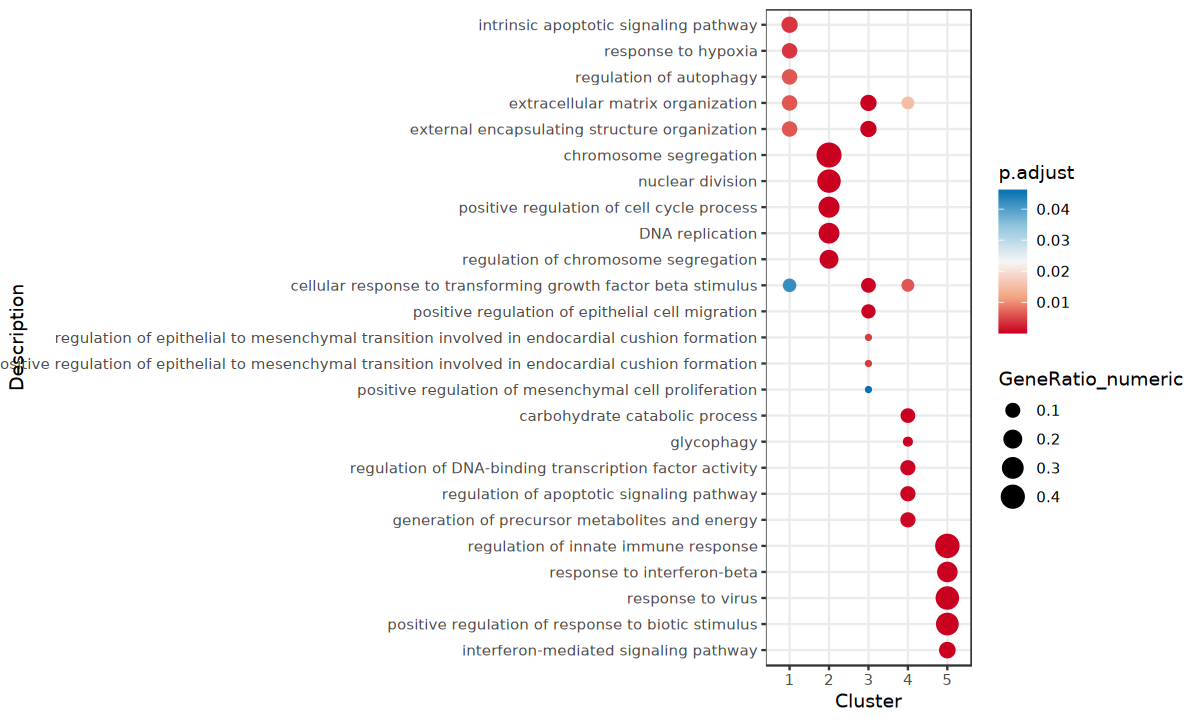

In [167]:
pdf('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure2.sup/GO_plot_cluster_selected_new.pdf',width = 10,height = 6)
options(repr.plot.width = 10, repr.plot.height = 6)
plot <- ggplot(compareClusterResult_selected) + geom_point(aes(x=Cluster,y=Description,color=p.adjust,size=GeneRatio_numeric))+scale_color_gradientn(colors = rev(colorRampPalette(rev(brewer.pal(n = 5, name = "RdBu")))(100)))+theme_bw()
print(plot)
dev.off()
print(plot)

In [329]:
write.table(compare_enrich@compareClusterResult,file='/syn1/liangzhen/jinhua_jilab_project/result/scRNA/GO_scRNA.csv',sep=',',col.names=NA,quote=F)